# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [10]:
# Import required packages
# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline



ModuleNotFoundError: No module named 'sklearn'

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [3]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [5]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [7]:
neg, pos = np.bincount(train_df['Default'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 255347
    Positive: 29653 (11.61% of total)



In [8]:
# Check for duplicate rows based on all columns
duplicate_rows = train_df.duplicated()
num_duplicate_rows = duplicate_rows.sum()
# do same for test_df
duplicate_rows_test = test_df.duplicated()
num_duplicate_rows_test = duplicate_rows_test.sum()

# Display the number of duplicate rows
print(num_duplicate_rows)

# Display the number of duplicate rows
print(num_duplicate_rows_test)


0
0


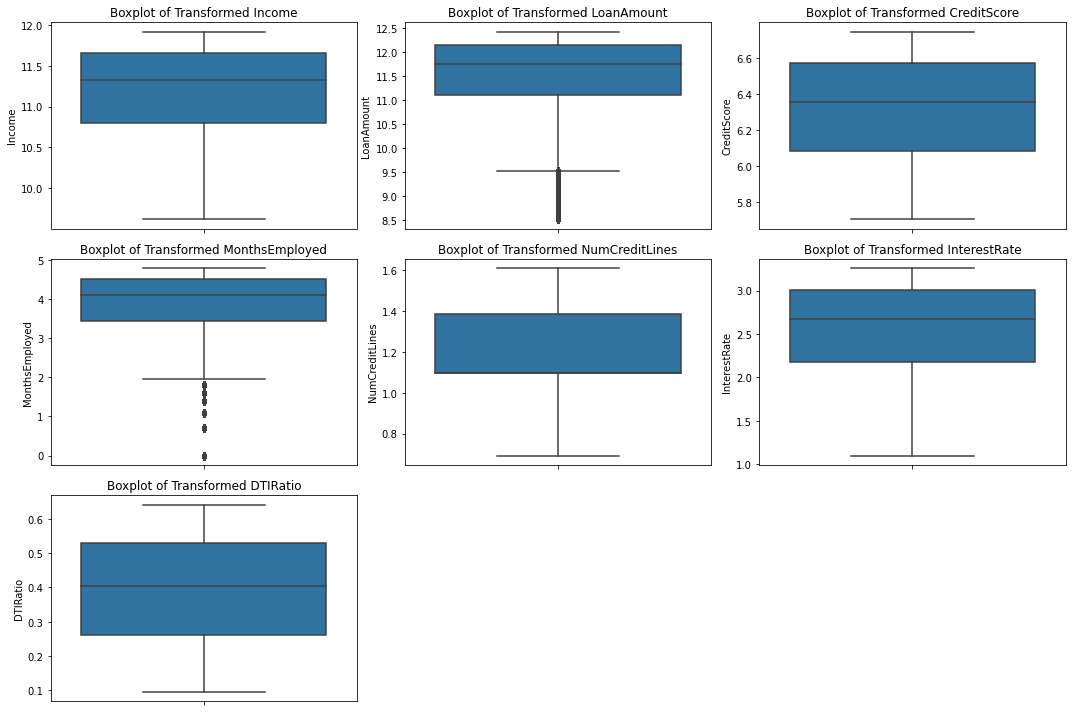

In [9]:
# Columns to be transformed
transform_cols = [
    'Income', 'LoanAmount', 'CreditScore', 
    'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'DTIRatio'
]

# Apply log transformation
train_df_transformed = train_df.copy()
for col in transform_cols:
    train_df_transformed[col] = np.log1p(train_df_transformed[col])


test_df_transformed = test_df.copy()
for col in transform_cols:
    test_df_transformed[col] = np.log1p(test_df_transformed[col])
    

# Create boxplots for transformed numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(transform_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=col, data=train_df_transformed)
    plt.title(f'Boxplot of Transformed {col}')

plt.tight_layout()
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to be encoded
categorical_cols = [
    'Education', 'EmploymentType', 'MaritalStatus', 
    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'
]

# Apply label encoding
label_encoder = LabelEncoder()
train_df_encoded = train_df_transformed.copy()
for col in categorical_cols:
    train_df_encoded[col] = label_encoder.fit_transform(train_df_encoded[col])

test_df_encoded = test_df_transformed.copy()
for col in categorical_cols:
    test_df_encoded[col] = label_encoder.fit_transform(test_df_encoded[col])

# Show first few rows of the encoded dataset
train_df_encoded.head()


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,11.362044,10.831470,6.255750,4.394449,1.609438,2.786861,36,0.364643,0,0,0,1,1,4,1,0
1,HPSK72WA7R,69,10.828401,11.731587,6.129050,2.772589,0.693147,1.759581,60,0.518794,2,0,1,0,0,4,1,0
2,C1OZ6DPJ8Y,46,11.341057,11.769032,6.113682,3.295837,1.386294,3.098740,24,0.270027,2,3,0,1,1,0,0,1
3,V2KKSFM3UN,32,10.364514,10.709963,6.612041,0.000000,1.386294,2.088153,24,0.207014,1,0,1,0,0,1,0,0
4,EY08JDHTZP,60,9.925151,9.120416,6.452049,2.197225,1.609438,2.016235,48,0.548121,0,3,0,0,1,0,0,0


In [11]:
# drop LoadID column
train_df_encoded = train_df_encoded.drop(['LoanID'], axis=1)
test_df_encoded = test_df_encoded.drop(['LoanID'], axis=1)

In [12]:
train_df_encoded.dtypes

Age                 int64
Income            float64
LoanAmount        float64
CreditScore       float64
MonthsEmployed    float64
NumCreditLines    float64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education           int64
EmploymentType      int64
MaritalStatus       int64
HasMortgage         int64
HasDependents       int64
LoanPurpose         int64
HasCoSigner         int64
Default             int64
dtype: object

In [13]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, val_df = train_test_split(train_df_encoded, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Default'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Default'))
# test_labels = np.array(test_df.pop('Default'))

train_features = np.array(train_df)
val_features = np.array(val_df)
# test_features = np.array(test_df)

In [14]:
print(f'Average class probability in training set:   {train_labels.mean():.4f}')
print(f'Average class probability in validation set: {val_labels.mean():.4f}')

Average class probability in training set:   0.1156
Average class probability in validation set: 0.1184


In [15]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)

Training labels shape: (204277,)
Validation labels shape: (51070,)
Training features shape: (204277, 16)
Validation features shape: (51070, 16)


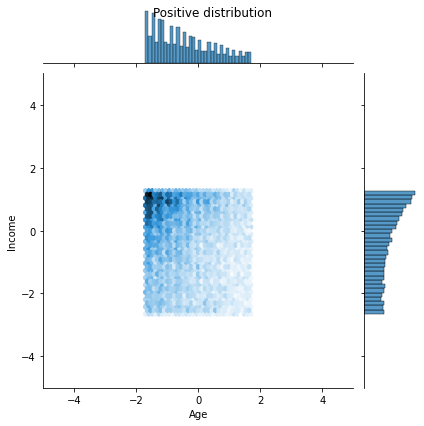

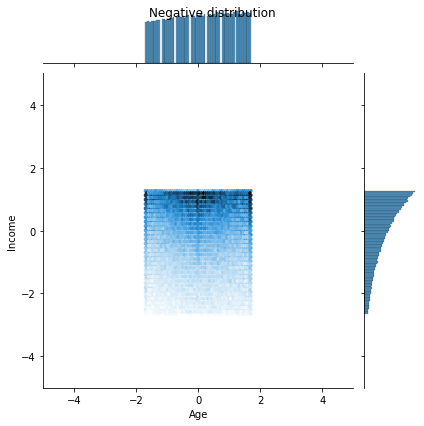

In [17]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(x=pos_df['Age'], y=pos_df['Income'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['Age'], y=neg_df['Income'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

# Model Train

In [18]:
METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-08-31 11:30:47.349113: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-31 11:30:47.349538: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [65]:
tf.__version__

'2.9.2'

In [44]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    # monitor='val_prc',
    monitor='auc',  
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)
model = make_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                272       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.predict(train_features[:10])

2023-08-31 11:33:28.882016: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-08-31 11:33:28.946333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 308ms/step


array([[0.38781223],
       [0.61516196],
       [0.22955562],
       [0.58445776],
       [0.18862166],
       [0.2827716 ],
       [0.35022157],
       [0.35375768],
       [0.30591515],
       [0.19256942]], dtype=float32)

In [22]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

2023-08-31 11:34:29.885428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Loss: 0.5048


In [23]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.0296168])

In [24]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

1/1 [==============================] - 0s 38ms/step


2023-08-31 11:35:01.401898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.15081926],
       [0.16715339],
       [0.08931719],
       [0.14804523],
       [0.34320578],
       [0.16970289],
       [0.10076714],
       [0.08291569],
       [0.10299277],
       [0.27644646]], dtype=float32)

In [25]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

2023-08-31 11:35:34.425568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Loss: 0.4595


In [26]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [27]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

2023-08-31 11:36:46.967889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-31 11:36:50.267677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [28]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

2023-08-31 11:37:30.560951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-31 11:37:33.182283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [29]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

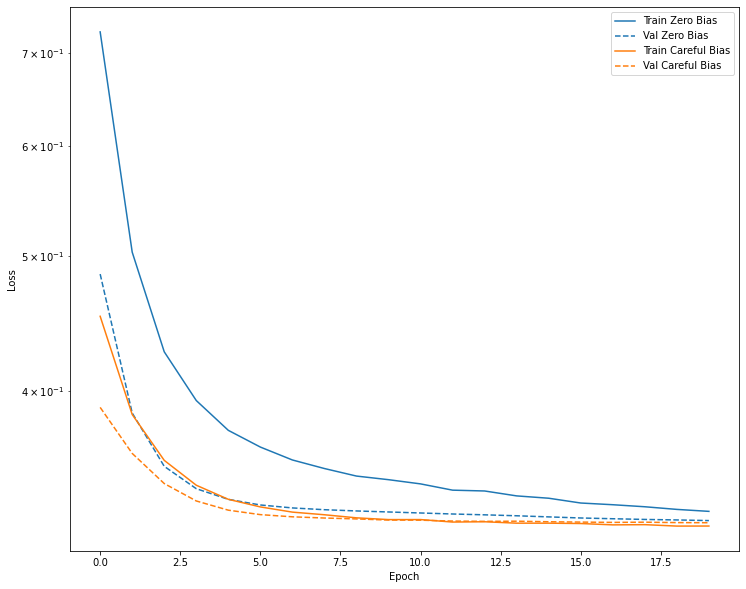

In [30]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [31]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100


2023-08-31 11:38:17.328730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.4524 - cross entropy: 0.4263 - Brier score: 0.1207 - tp: 692.0000 - fp: 6897.0000 - tn: 218797.0000 - fn: 28961.0000 - accuracy: 0.8596 - precision: 0.0912 - recall: 0.0233 - auc: 0.5040 - prc: 0.1164

2023-08-31 11:38:21.119188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 6s 44ms/step - loss: 0.4524 - cross entropy: 0.4263 - Brier score: 0.1207 - tp: 692.0000 - fp: 6897.0000 - tn: 218797.0000 - fn: 28961.0000 - accuracy: 0.8596 - precision: 0.0912 - recall: 0.0233 - auc: 0.5040 - prc: 0.1164 - val_loss: 0.3888 - val_cross entropy: 0.3888 - val_Brier score: 0.1087 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45022.0000 - val_fn: 6048.0000 - val_accuracy: 0.8816 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4684 - val_prc: 0.1111
Epoch 2/100
100/100 [==============================] - 3s 27ms/step - loss: 0.3843 - cross entropy: 0.3843 - Brier score: 0.1084 - tp: 154.0000 - fp: 900.0000 - tn: 179772.0000 - fn: 23451.0000 - accuracy: 0.8808 - precision: 0.1461 - recall: 0.0065 - auc: 0.5235 - prc: 0.1230 - val_loss: 0.3601 - val_cross entropy: 0.3601 - val_Brier score: 0.1033 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45022.0000 - val_fn: 6048.0000 - val_accuracy: 0.8816 - val_pr

In [35]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

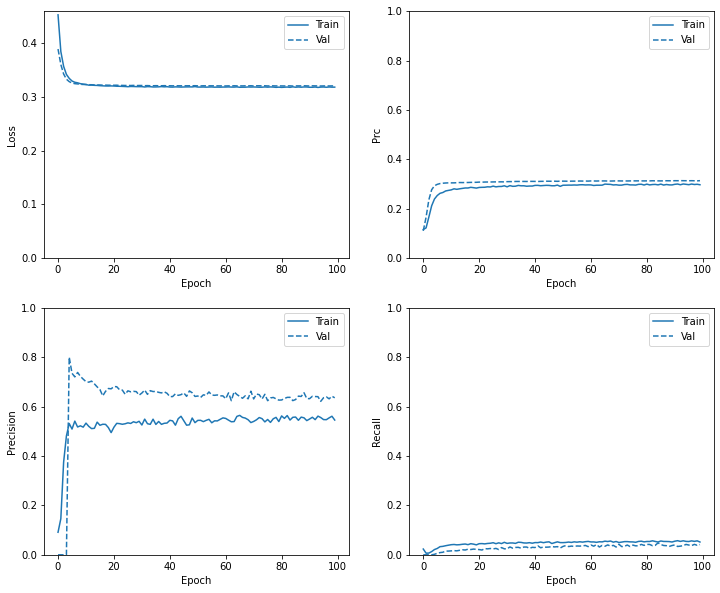

In [33]:
plot_metrics(baseline_history)

In [36]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
# test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

 36/100 [=========>....................] - ETA: 0s

2023-08-31 12:33:27.828338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 0s 3ms/step


In [37]:
def plot_cm(labels, predictions, threshold=0.5):
  cm = confusion_matrix(labels, predictions > threshold)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(threshold))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.31255096197128296
cross entropy :  0.31255096197128296
Brier score :  0.09110435843467712
tp :  1031.0
fp :  523.0
tn :  180149.0
fn :  22574.0
accuracy :  0.886932909488678
precision :  0.6634491682052612
recall :  0.0436771884560585
auc :  0.7530536651611328
prc :  0.3218839168548584

Legitimate Transactions Detected (True Negatives):  180149
Legitimate Transactions Incorrectly Detected (False Positives):  523
Fraudulent Transactions Missed (False Negatives):  22574
Fraudulent Transactions Detected (True Positives):  1031
Total Fraudulent Transactions:  23605


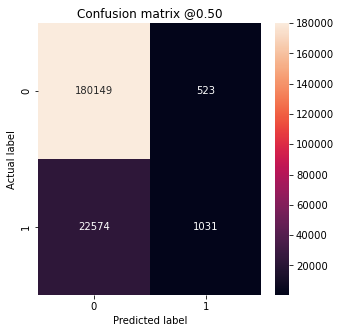

In [39]:
baseline_results = model.evaluate(train_features, train_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(train_labels, train_predictions_baseline)

Legitimate Transactions Detected (True Negatives):  110511
Legitimate Transactions Incorrectly Detected (False Positives):  70161
Fraudulent Transactions Missed (False Negatives):  5809
Fraudulent Transactions Detected (True Positives):  17796
Total Fraudulent Transactions:  23605
Legitimate Transactions Detected (True Negatives):  1024
Legitimate Transactions Incorrectly Detected (False Positives):  179648
Fraudulent Transactions Missed (False Negatives):  13
Fraudulent Transactions Detected (True Positives):  23592
Total Fraudulent Transactions:  23605


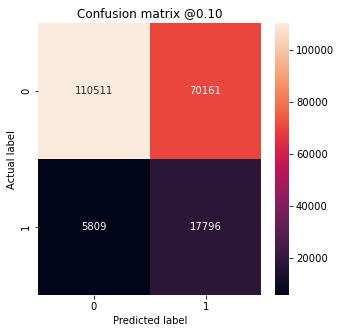

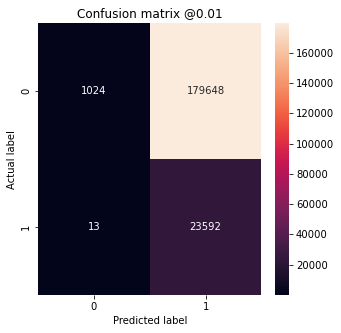

In [41]:
plot_cm(train_labels, train_predictions_baseline, threshold=0.1)
plot_cm(train_labels, train_predictions_baseline, threshold=0.01)

In [42]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.57
Weight for class 1: 4.31


In [45]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/100


2023-08-31 12:48:53.636211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 1.1735 - cross entropy: 0.5502 - Brier score: 0.1743 - tp: 6530.0000 - fp: 37705.0000 - tn: 187989.0000 - fn: 23123.0000 - accuracy: 0.7618 - precision: 0.1476 - recall: 0.2202 - auc: 0.4949 - prc: 0.1257

2023-08-31 12:48:57.695872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 7s 46ms/step - loss: 1.1735 - cross entropy: 0.5502 - Brier score: 0.1743 - tp: 6530.0000 - fp: 37705.0000 - tn: 187989.0000 - fn: 23123.0000 - accuracy: 0.7618 - precision: 0.1476 - recall: 0.2202 - auc: 0.4949 - prc: 0.1257 - val_loss: 0.4803 - val_cross entropy: 0.4803 - val_Brier score: 0.1521 - val_tp: 667.0000 - val_fp: 4229.0000 - val_tn: 40793.0000 - val_fn: 5381.0000 - val_accuracy: 0.8118 - val_precision: 0.1362 - val_recall: 0.1103 - val_auc: 0.5095 - val_prc: 0.1250
Epoch 2/100
100/100 [==============================] - 3s 25ms/step - loss: 0.8691 - cross entropy: 0.6024 - Brier score: 0.2005 - tp: 7270.0000 - fp: 42684.0000 - tn: 137988.0000 - fn: 16335.0000 - accuracy: 0.7111 - precision: 0.1455 - recall: 0.3080 - auc: 0.5482 - prc: 0.1400 - val_loss: 0.5236 - val_cross entropy: 0.5236 - val_Brier score: 0.1714 - val_tp: 2092.0000 - val_fp: 7827.0000 - val_tn: 37195.0000 - val_fn: 3956.0000 - val_accuracy: 0.7693 - val_precision:

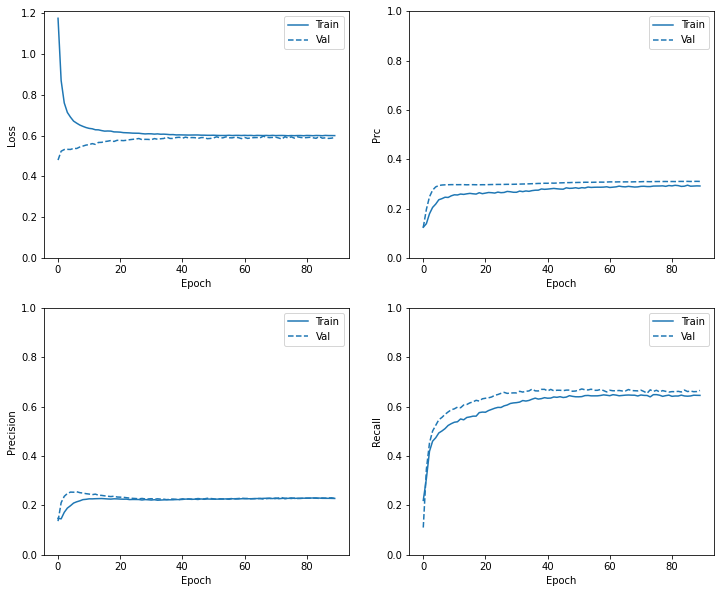

In [46]:
plot_metrics(weighted_history)

In [47]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
# test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

100/100 [==============================] - 0s 2ms/step


2023-08-31 12:52:39.439881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


loss :  0.5861415266990662
cross entropy :  0.5861415266990662
Brier score :  0.2000250369310379
tp :  15758.0
fp :  53208.0
tn :  127464.0
fn :  7847.0
accuracy :  0.7011166214942932
precision :  0.22848939895629883
recall :  0.6675704121589661
auc :  0.7529593706130981
prc :  0.31889012455940247

Legitimate Transactions Detected (True Negatives):  127464
Legitimate Transactions Incorrectly Detected (False Positives):  53208
Fraudulent Transactions Missed (False Negatives):  7847
Fraudulent Transactions Detected (True Positives):  15758
Total Fraudulent Transactions:  23605


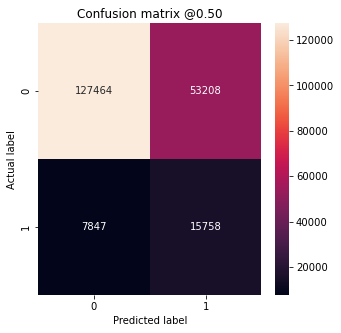

In [49]:
weighted_results = weighted_model.evaluate(train_features, train_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(train_labels, train_predictions_weighted)

### oversampling


In [50]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [51]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(180672, 16)

In [52]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(361344, 16)

In [53]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [54]:
# Each dataset provides (feature, label) pairs:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-1.30181781 -1.33959841  0.87568594  0.14444376 -0.24777272 -0.28923164
  1.11464054 -1.41681066  0.80000954  0.45263362 -0.44820959  1.22337318
  0.99901653 -1.00154321 -0.70820834 -1.00057292]

Label:  1


In [55]:
# Merge the two together using tf.data.Dataset.sample_from_datasets:
resampled_ds = tf.data.Dataset.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.49072265625


In [56]:
# To use this dataset, you'll need the number of steps per epoch.
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

221.0

### Train on the oversampled data

In [57]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100


2023-08-31 12:55:45.832135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


221/221 [==============================] - ETA: 0s - loss: 0.8055 - cross entropy: 0.7373 - Brier score: 0.2619 - tp: 136344.0000 - fp: 172828.0000 - tn: 234869.0000 - fn: 112844.0000 - accuracy: 0.5651 - precision: 0.4410 - recall: 0.5472 - auc: 0.5755 - prc: 0.4381

2023-08-31 12:55:53.252495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


221/221 [==============================] - 10s 37ms/step - loss: 0.8055 - cross entropy: 0.7373 - Brier score: 0.2619 - tp: 136344.0000 - fp: 172828.0000 - tn: 234869.0000 - fn: 112844.0000 - accuracy: 0.5651 - precision: 0.4410 - recall: 0.5472 - auc: 0.5755 - prc: 0.4381 - val_loss: 0.6868 - val_cross entropy: 0.6868 - val_Brier score: 0.2466 - val_tp: 3825.0000 - val_fp: 20315.0000 - val_tn: 24707.0000 - val_fn: 2223.0000 - val_accuracy: 0.5587 - val_precision: 0.1585 - val_recall: 0.6324 - val_auc: 0.6254 - val_prc: 0.1973
Epoch 2/100
221/221 [==============================] - 6s 26ms/step - loss: 0.6594 - cross entropy: 0.6594 - Brier score: 0.2334 - tp: 137563.0000 - fp: 88611.0000 - tn: 137976.0000 - fn: 88458.0000 - accuracy: 0.6088 - precision: 0.6082 - recall: 0.6086 - auc: 0.6505 - prc: 0.6534 - val_loss: 0.6257 - val_cross entropy: 0.6257 - val_Brier score: 0.2172 - val_tp: 3933.0000 - val_fp: 14363.0000 - val_tn: 30659.0000 - val_fn: 2115.0000 - val_accuracy: 0.6773 - val_

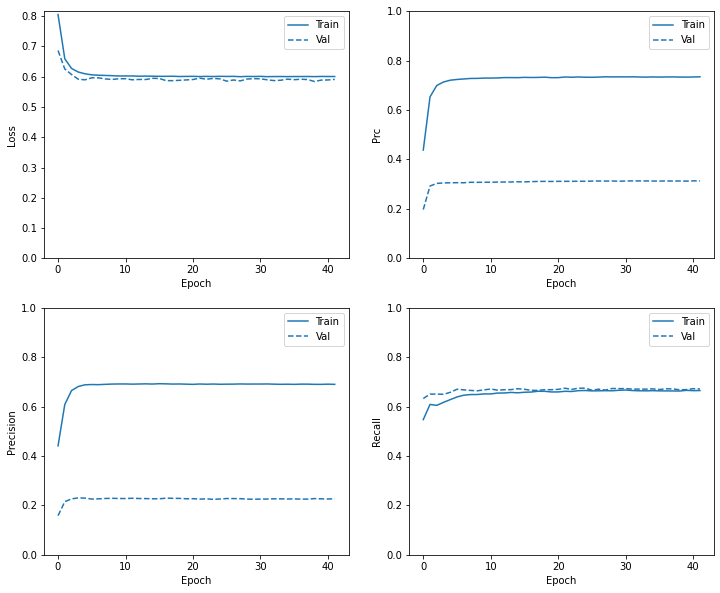

In [58]:
# Check training history
plot_metrics(resampled_history)

### Re-train

In [59]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000


2023-08-31 12:59:52.604668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/20 [==========================>...] - ETA: 0s - loss: 0.9973 - cross entropy: 0.7614 - Brier score: 0.2633 - tp: 11688.0000 - fp: 23536.0000 - tn: 39935.0000 - fn: 12775.0000 - accuracy: 0.5871 - precision: 0.3318 - recall: 0.4778 - auc: 0.5502 - prc: 0.3313

2023-08-31 12:59:54.760089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 4s 148ms/step - loss: 0.9938 - cross entropy: 0.7704 - Brier score: 0.2666 - tp: 12584.0000 - fp: 24652.0000 - tn: 40898.0000 - fn: 13896.0000 - accuracy: 0.5811 - precision: 0.3380 - recall: 0.4752 - auc: 0.5450 - prc: 0.3363 - val_loss: 0.8283 - val_cross entropy: 0.8283 - val_Brier score: 0.3064 - val_tp: 2292.0000 - val_fp: 24310.0000 - val_tn: 20712.0000 - val_fn: 3756.0000 - val_accuracy: 0.4504 - val_precision: 0.0862 - val_recall: 0.3790 - val_auc: 0.3941 - val_prc: 0.0923
Epoch 2/1000
20/20 [==============================] - 1s 46ms/step - loss: 0.9274 - cross entropy: 0.9274 - Brier score: 0.3297 - tp: 9221.0000 - fp: 11165.0000 - tn: 9469.0000 - fn: 11105.0000 - accuracy: 0.4563 - precision: 0.4523 - recall: 0.4537 - auc: 0.4406 - prc: 0.4517 - val_loss: 0.8082 - val_cross entropy: 0.8082 - val_Brier score: 0.3000 - val_tp: 2540.0000 - val_fp: 24934.0000 - val_tn: 20088.0000 - val_fn: 3508.0000 - val_accuracy: 0.4431 - val_precision: 

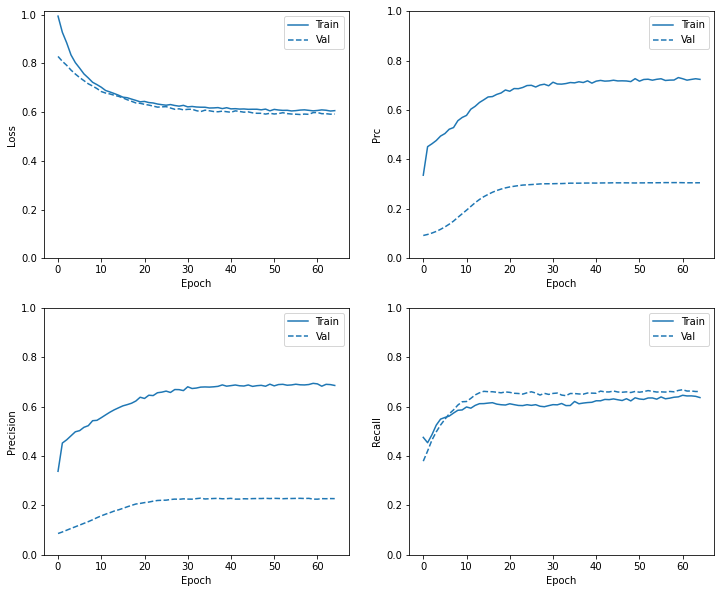

In [60]:
plot_metrics(resampled_history)

In [61]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
# test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

 60/100 [=================>............] - ETA: 0s

2023-08-31 13:00:55.570968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 0s 2ms/step


2023-08-31 13:00:56.764234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


loss :  0.5892884135246277
cross entropy :  0.5892884135246277
Brier score :  0.20115964114665985
tp :  15756.0
fp :  53768.0
tn :  126904.0
fn :  7849.0
accuracy :  0.6983654499053955
precision :  0.22662678360939026
recall :  0.6674857139587402
auc :  0.750404953956604
prc :  0.313603937625885

Legitimate Transactions Detected (True Negatives):  126904
Legitimate Transactions Incorrectly Detected (False Positives):  53768
Fraudulent Transactions Missed (False Negatives):  7849
Fraudulent Transactions Detected (True Positives):  15756
Total Fraudulent Transactions:  23605


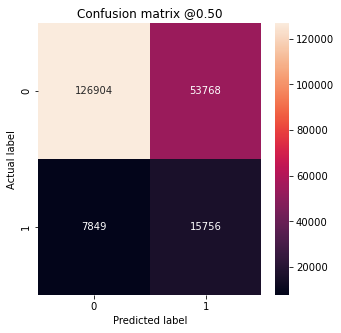

In [62]:
resampled_results = resampled_model.evaluate(train_features, train_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()
plot_cm(train_labels, train_predictions_resampled)